<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/AdaBoost_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

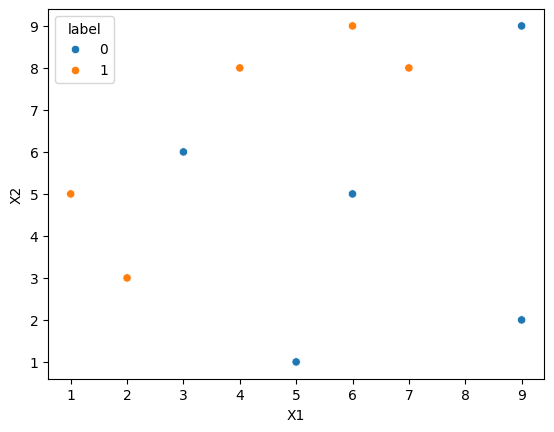

In [3]:
# create a simple dataset
df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

# plot the dataset
sns.scatterplot(x=df['X1'] , y=df['X2'] , hue=df['label'])
plt.show()

Initialize weights

In [4]:
df['weights'] = 1/ df.shape[0]

first decision tree or weak learner

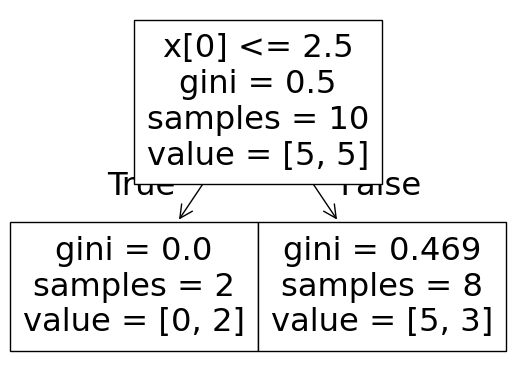

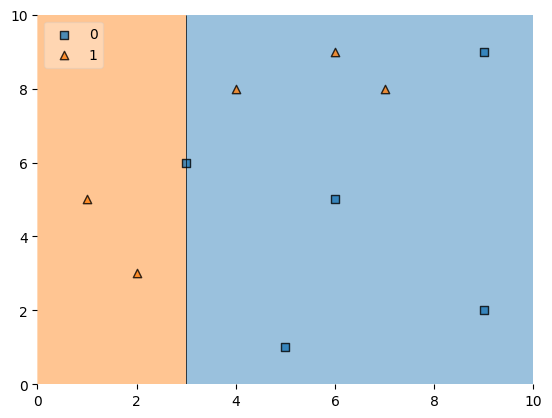

In [5]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(x,y)

plot_tree(dt1)
plt.show()

plot_decision_regions(x,y,clf=dt1,legend=2)
plt.show()

df['y_pred'] = dt1.predict(x)

calculate model weight(Alpha)

In [6]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)


In [9]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


from here we can see that 3 are different from original prediction
from total we can see that total are 10 and .3 is error in this

In [10]:
error1 = 0.3
alpha1 = calculate_model_weight(error1)
alpha1

np.float64(0.42364893019360184)

In [11]:
# update the weights

In [12]:
def update_row_weights(row,alpha):
  if row['label'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)
df['updated_weights'] =df.apply(update_row_weights,alpha=alpha1,axis=1)
df

df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


create a new dataset

In [14]:
def create_new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    a = np.random.random()
    for index , row in df.iterrows():
      if row['cumsum_upper']>a and a > row['cumsum_lower']:
        indices.append(index)

  return indices
df['cumsum_upper']  = np.cumsum(df['normalized_weights'])
df['cumsum_lower']  = df['cumsum_upper'] - df['normalized_weights']
index_values = create_new_dataset(df)
new_df = df.iloc[index_values,[0,1,2,3]]
new_df



,X1,X2,label,weights
1,2,3,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1


train the second weak learner

train the second weak learner

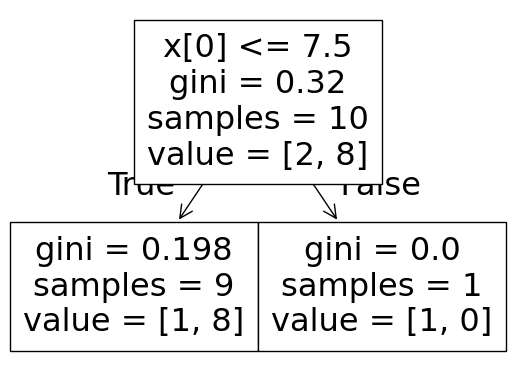

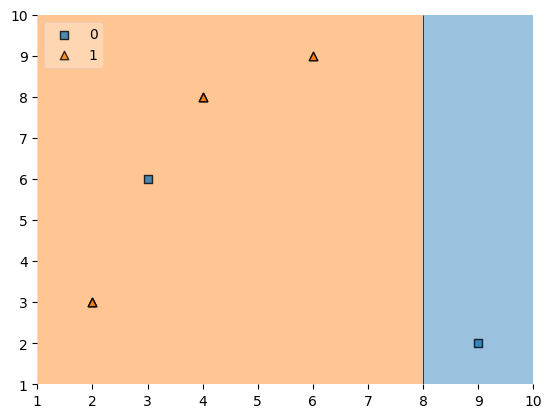

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
2,3,6,0,0.1,1


In [15]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X_new, y_new)

plot_tree(dt2)
plt.show()

plot_decision_regions(X_new, y_new, clf=dt2, legend=2)
plt.show()

new_df['y_pred'] = dt2.predict(X_new)
new_df

from this we can see that 1 is miss leading it

In [16]:
error2 = 0.1
alpha2 = calculate_model_weight(error2)
alpha2

np.float64(1.0986122886681098)

update weights again

In [17]:
new_df['updated_weights'] = new_df.apply(update_row_weights, alpha=alpha2, axis=1)

new_df['normalized_weights'] = new_df['updated_weights'] / new_df['updated_weights'].sum()
new_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
1,2,3,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
1,2,3,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
1,2,3,1,0.1,1,0.033333,0.055556
9,9,2,0,0.1,0,0.033333,0.055556
5,6,9,1,0.1,1,0.033333,0.055556
5,6,9,1,0.1,1,0.033333,0.055556
2,3,6,0,0.1,1,0.300000,0.500000


train the third weak learner

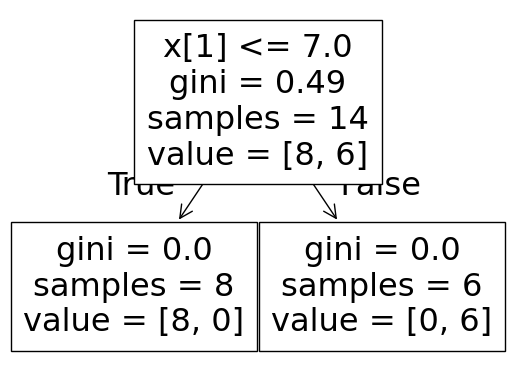

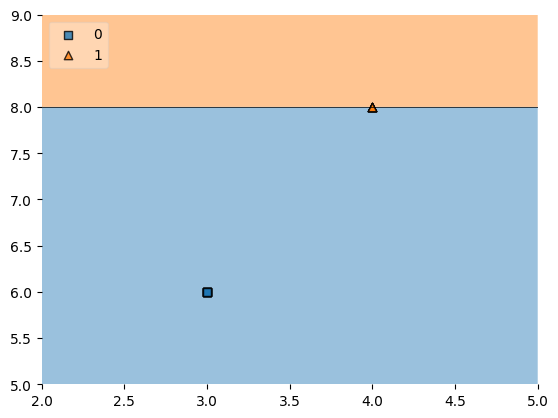

,X1,X2,label,y_pred
2,3,6,0,0
2,3,6,0,0
3,4,8,1,1
3,4,8,1,1
3,4,8,1,1
3,4,8,1,1
3,4,8,1,1
3,4,8,1,1
2,3,6,0,0
2,3,6,0,0


In [23]:
# Create a new dataset based on the normalized weights from the previous iteration
new_df['cumsum_upper']  = np.cumsum(new_df['normalized_weights'])
new_df['cumsum_lower']  = new_df['cumsum_upper'] - new_df['normalized_weights']
index_values = create_new_dataset(new_df) # Use the 'new_df' from the previous step with updated weights
new_df_third_learner = new_df.loc[index_values, ['X1', 'X2', 'label']] # Create a new dataframe for the third learner

X_new_third = new_df_third_learner.iloc[:, 0:2].values
y_new_third = new_df_third_learner.iloc[:, 2].values

dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X_new_third, y_new_third)

plot_tree(dt3)
plt.show()

plot_decision_regions(X_new_third, y_new_third, clf=dt3, legend=2)
plt.show()

new_df_third_learner['y_pred'] = dt3.predict(X_new_third)
new_df_third_learner

In [27]:
error3 = 0.001 # Changed from 0.0 to a small non-zero value
alpha3 = calculate_model_weight(error3)
alpha3

np.float64(3.453377389324277)

final strong classifier

In [28]:
def final_prediction(query, classifiers, alphas):
    predictions = np.array([clf.predict(query) for clf in classifiers])
    final_score = np.dot(alphas, predictions)
    return np.sign(final_score)

classifiers = [dt1, dt2, dt3]
alphas = [alpha1, alpha2, alpha3]

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)

print(final_prediction(query1, classifiers, alphas))
print(final_prediction(query2, classifiers, alphas))

[1.]
[1.]
